# Atividade - Regressão Linear

Aluno: João R. Cioffi

## Estudo de caso: indústria de sorvetes

Considere uma indústria que fabrica sorvetes e você está responsável por fazer as estimativas de vendas da área financeira.

**Objetivo:** Estimar qual o volume de vendas (em R$) de sorvetes no dia 30/10/2023

1. Criação das variáveis
    - 1.1 criar variável referente ao dia da semana
    - 1.2 criar variável referente ao mês da venda
2. Análises univariadas
    - 2.1 análises descritivas
    - 2.2 análises gráficas (barras, histogramas, etc)
3. Análises bi-variadas
    - 3.1 gráfico de dispersão (vendas (y) Vs. temperatura (x))
4. definir equação através de uma regressão linear
5. fazer uma previsão do total faturado com as vendas (em R$) no dia 30/10/23, sabendo que a previsão do tempo aponta para 18°C
6. elaborar uma recomendação para o Diretor Financeiro da empresa

## main libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## carregando os dados

In [80]:
df_raw=pd.read_csv('sales.csv',delimiter=';')
df_raw

,date,temperature_F,total_sales_RS,temperature_C
0,Monday/March 1/2004,65.0,38.911,24.0
1,Tuesday/March 2/2004,63.0,36.337,23.0
2,Wednesday/March 3/2004,62.0,35.728,22.0
3,Thursday/March 4/2004,65.0,36.945,24.0
4,Friday/March 5/2004,63.0,36.335,23.0
...,...,...,...,...
7178,Thursday/October 26/2023,NaN,NaN,NaN
7179,Friday/October 27/2023,NaN,NaN,NaN
7180,Saturday/October 28/2023,NaN,NaN,NaN
7181,Sunday/October 29/2023,NaN,NaN,NaN


In [81]:
# verificando dTypes e nulos
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            7183 non-null   object 
 1   temperature_F   7176 non-null   float64
 2   total_sales_RS  7176 non-null   object 
 3   temperature_C   7176 non-null   float64
dtypes: float64(2), object(2)
memory usage: 224.6+ KB


## 1. criação de variáveis

### 1.1 criação do dia da semana

In [82]:
dia_da_semana=[] # lista para armazenar os dias da semana
# iterando sobre a coluna "date" para separar as variáveis desejadas
for ds in df_raw.date.values:
    if ds.split('/')[0] == 'Sunday':
        dia_da_semana.append('domingo')
    elif ds.split('/')[0] == 'Monday':
        dia_da_semana.append('segunda-feira')
    elif ds.split('/')[0] == 'Tuesday':
        dia_da_semana.append('terça-feira')
    elif ds.split('/')[0] == 'Wednesday':
        dia_da_semana.append('quarta-feira')    
    elif ds.split('/')[0] == 'Thursday':
        dia_da_semana.append('quinta-feira')
    elif ds.split('/')[0] == 'Friday':
        dia_da_semana.append('sexta-feira')
    else:
        dia_da_semana.append('sábado')
        
df_raw['dia_da_semana'] = dia_da_semana

### 1.2 criação do mês de venda

In [83]:
mes_venda=[] # lista para armazenar os meses
# iterando sobre a coluna "date" para separar as variáveis desejadas
for m in df_raw.date.values:
    if m.split('/')[1].split(' ')[0] == 'January':
        mes_venda.append('jan')
    elif m.split('/')[1].split(' ')[0] == 'February':
        mes_venda.append('fev')
    elif m.split('/')[1].split(' ')[0] == 'March':
        mes_venda.append('mar')
    elif m.split('/')[1].split(' ')[0] == 'April':
        mes_venda.append('abr')
    elif m.split('/')[1].split(' ')[0] == 'May':
        mes_venda.append('mai')
    elif m.split('/')[1].split(' ')[0] == 'June':
        mes_venda.append('jun')
    elif m.split('/')[1].split(' ')[0] == 'July':
        mes_venda.append('jul')
    elif m.split('/')[1].split(' ')[0] == 'August':
        mes_venda.append('ago')
    elif m.split('/')[1].split(' ')[0] == 'September':
        mes_venda.append('set')
    elif m.split('/')[1].split(' ')[0] == 'October':
        mes_venda.append('out')
    elif m.split('/')[1].split(' ')[0] == 'November':
        mes_venda.append('nov')
    else:
        mes_venda.append('dez')

df_raw['mes_venda']=mes_venda

### 1.3 criação do ano

In [84]:
ano=[]
for a in df_raw.date.values:
    ano.append(a.split('/')[-1])
    
df_raw['ano']=ano

### validando alterações na base original

In [85]:
df_raw

,date,temperature_F,total_sales_RS,temperature_C,dia_da_semana,mes_venda,ano
0,Monday/March 1/2004,65.0,38.911,24.0,segunda-feira,mar,2004
1,Tuesday/March 2/2004,63.0,36.337,23.0,terça-feira,mar,2004
2,Wednesday/March 3/2004,62.0,35.728,22.0,quarta-feira,mar,2004
3,Thursday/March 4/2004,65.0,36.945,24.0,quinta-feira,mar,2004
4,Friday/March 5/2004,63.0,36.335,23.0,sexta-feira,mar,2004
...,...,...,...,...,...,...,...
7178,Thursday/October 26/2023,NaN,NaN,NaN,quinta-feira,out,2023
7179,Friday/October 27/2023,NaN,NaN,NaN,sexta-feira,out,2023
7180,Saturday/October 28/2023,NaN,NaN,NaN,sábado,out,2023
7181,Sunday/October 29/2023,NaN,NaN,NaN,domingo,out,2023


## 2. análises univariadas

Antes de fazermos as análises, precisamos primeiro tratar nossos dados (como por exemplo a remoção de nulos e mudança dos dtypes, bem como a separação da base entre o desejado para a predição e a amostra a ser usada nas análises)

In [88]:
# desejado para a predição/estimativa
df_target=pd.DataFrame(df_raw.iloc[-1:]) #separando a última linha

# alterando dTypes
df_target['date']=df_target['date'].astype('string')
df_target['temperature_F']=df_target['temperature_F'].astype('float64')
df_target['total_sales_RS']=df_target['total_sales_RS'].astype('string')
df_target['temperature_C']=df_target['temperature_C'].astype('float64')
df_target['dia_da_semana']=df_target['dia_da_semana'].astype('category')
df_target['mes_venda']=df_target['mes_venda'].astype('category')
df_target['ano']=df_target['ano'].astype('category')

# verificando alterações
df_target.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 7182 to 7182
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date            1 non-null      string  
 1   temperature_F   1 non-null      float64 
 2   total_sales_RS  1 non-null      string  
 3   temperature_C   1 non-null      float64 
 4   dia_da_semana   1 non-null      category
 5   mes_venda       1 non-null      category
 6   ano             1 non-null      category
dtypes: category(3), float64(2), string(2)
memory usage: 515.0 bytes


In [89]:
df_target

,date,temperature_F,total_sales_RS,temperature_C,dia_da_semana,mes_venda,ano
7182,Monday/October 30/2023,65.0,?,18.0,segunda-feira,out,2023


In [90]:
# desejado para usar nas análises
df_sample=pd.DataFrame(df_raw.iloc[:-1]) #separando todas as linhas com exceção da última

# alterando dTypes
df_sample['date']=df_sample['date'].astype('string')
df_sample['temperature_F']=df_sample['temperature_F'].astype('float64')
df_sample['total_sales_RS']=df_sample['total_sales_RS'].astype('float64')
df_sample['temperature_C']=df_sample['temperature_C'].astype('float64')
df_sample['dia_da_semana']=df_sample['dia_da_semana'].astype('category')
df_sample['mes_venda']=df_sample['mes_venda'].astype('category')
df_sample['ano']=df_sample['ano'].astype('category')

# preenchendo NaN com a média dos valores
df_sample['temperature_F']=df_sample['temperature_F'].fillna(df_sample['temperature_F'].mean())
df_sample['total_sales_RS']=df_sample['total_sales_RS'].fillna(df_sample['total_sales_RS'].mean())
df_sample['temperature_C']=df_sample['temperature_C'].fillna(df_sample['temperature_C'].mean())

# verificando alterações
df_sample.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date            7182 non-null   string  
 1   temperature_F   7182 non-null   float64 
 2   total_sales_RS  7182 non-null   float64 
 3   temperature_C   7182 non-null   float64 
 4   dia_da_semana   7182 non-null   category
 5   mes_venda       7182 non-null   category
 6   ano             7182 non-null   category
dtypes: category(3), float64(3), string(1)
memory usage: 247.0 KB


In [91]:
df_sample.head()

,date,temperature_F,total_sales_RS,temperature_C,dia_da_semana,mes_venda,ano
0,Monday/March 1/2004,65.0,38.911,24.0,segunda-feira,mar,2004
1,Tuesday/March 2/2004,63.0,36.337,23.0,terça-feira,mar,2004
2,Wednesday/March 3/2004,62.0,35.728,22.0,quarta-feira,mar,2004
3,Thursday/March 4/2004,65.0,36.945,24.0,quinta-feira,mar,2004
4,Friday/March 5/2004,63.0,36.335,23.0,sexta-feira,mar,2004


### 2.1 análises descritivas

In [92]:
# distribuição das variáveis
df_sample.describe(percentiles=[
    .001,.01,.1,.25,.5,.75,.9,.99,.999
])

,temperature_F,total_sales_RS,temperature_C
count,7182.000000,7182.000000,7182.000000
mean,73.906620,40.154737,25.427735
std,13.661511,5.639948,6.290492
min,42.000000,28.238000,11.000000
0.1%,44.000000,28.696172,12.000000
1%,47.000000,29.591720,14.000000
10%,56.000000,32.480400,18.000000
25%,62.000000,36.367500,21.000000
50%,74.000000,39.059000,24.000000
75%,86.000000,45.447750,31.000000


In [93]:
# correlação numérica (Pearson)
df_sample[['temperature_C','temperature_F','total_sales_RS']].corr()

,temperature_C,temperature_F,total_sales_RS
temperature_C,1.000000,0.913740,0.966105
temperature_F,0.913740,1.000000,0.903711
total_sales_RS,0.966105,0.903711,1.000000


In [94]:
# contagem de registros por dia da semana
df_sample.dia_da_semana.value_counts()

dia_da_semana
domingo          1026
quarta-feira     1026
quinta-feira     1026
segunda-feira    1026
sexta-feira      1026
sábado           1026
terça-feira      1026
Name: count, dtype: int64

In [95]:
# contagem de registros por mes de venda
df_sample.mes_venda.value_counts()

mes_venda
ago    620
jul    620
mai    620
mar    620
out    618
abr    600
jun    600
set    600
dez    589
jan    589
nov    570
fev    536
Name: count, dtype: int64

In [96]:
# contagem de registros por ano
df_sample.ano.value_counts()

ano
2020    366
2008    366
2016    366
2012    366
2014    365
2005    365
2019    365
2018    365
2017    365
2015    365
2013    365
2022    365
2011    365
2010    365
2009    365
2007    365
2006    365
2021    365
2004    306
2023    302
Name: count, dtype: int64

### 2.2 análises gráficas

array([[<AxesSubplot:title={'center':'temperature_F'}>,
        <AxesSubplot:title={'center':'total_sales_RS'}>],
       [<AxesSubplot:title={'center':'temperature_C'}>, <AxesSubplot:>]],
      dtype=object)

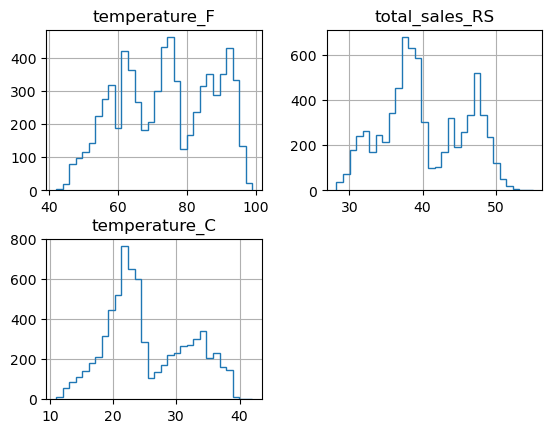

In [97]:
# histograma
df_sample.drop(['ano'],axis=1).hist(bins=30,histtype='step')

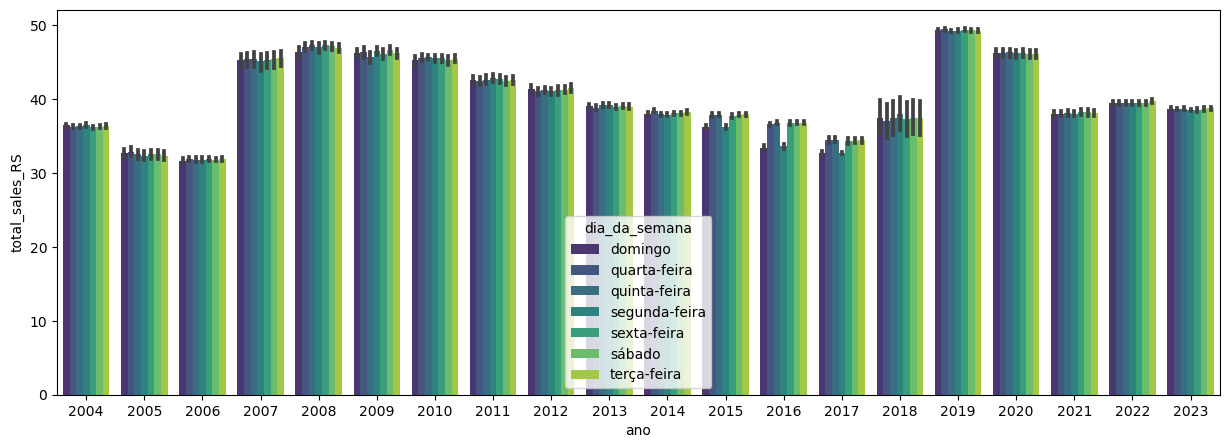

In [98]:
# gráfico de barras
plt.figure(figsize=(15,5))
sns.barplot(data=df_sample,x='ano',y='total_sales_RS',hue='dia_da_semana',palette='viridis')
plt.show()

Text(0.5, 0, 'Index')

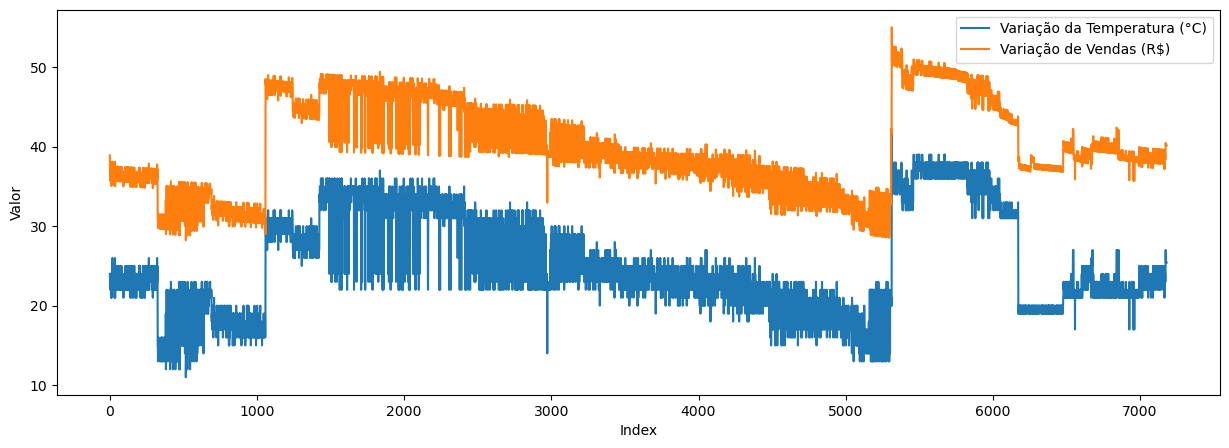

In [99]:
# série temporal
plt.figure(figsize=(15,5))
plt.plot(df_sample['temperature_C'].values)
plt.plot(df_sample['total_sales_RS'].values)
plt.legend(('Variação da Temperatura (°C)','Variação de Vendas (R$)'))
plt.ylabel('Valor')
plt.xlabel('Index')

## 3. análises multivariadas

### 3.1 gráfico de dispersão (vendas (y) Vs. temperatura (x))

<AxesSubplot:xlabel='temperature_C', ylabel='total_sales_RS'>

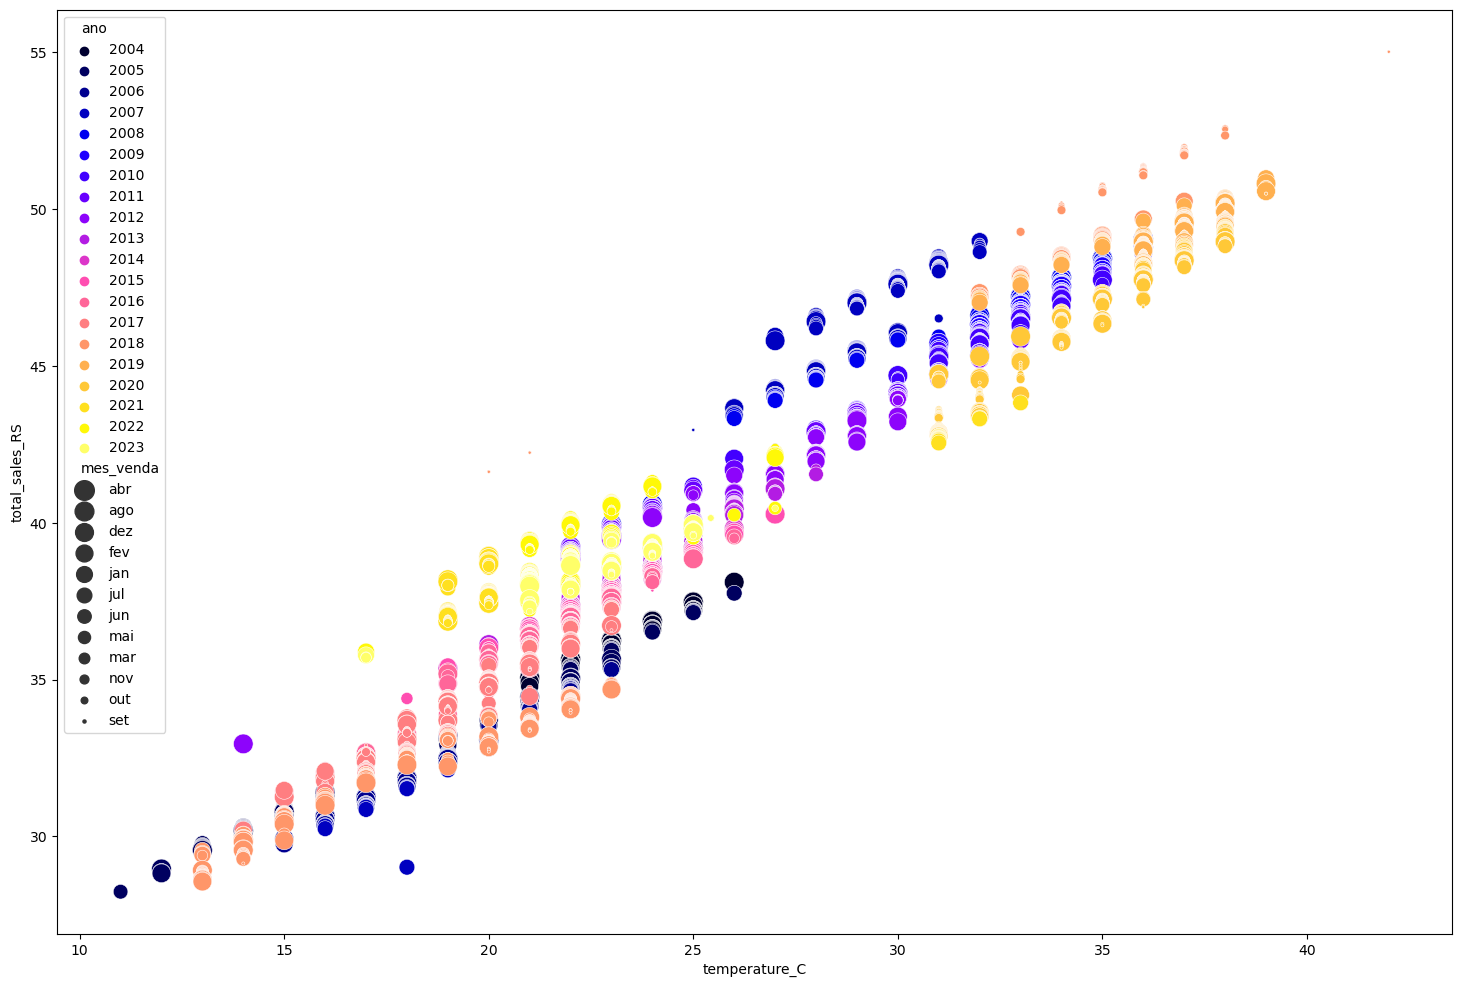

In [116]:
# scatterplot
plt.figure(figsize=(18,12))
sns.scatterplot(data=df_sample, x="temperature_C",y="total_sales_RS",
                hue='ano',size='mes_venda',sizes=(5,200),palette='gnuplot2')

## 4. regressão linear

https://pt.khanacademy.org/math/algebra/x2f8bb11595b61c86:forms-of-linear-equations/x2f8bb11595b61c86:writing-slope-intercept-equations/v/equation-of-a-line-3

Para definirmos uma equação de regressão linear, podemos utilizar a equação reduzida de reta para dois pontos conhecidos.
Ela define a função de uma curva linear (de primeiro grau), e pode ser descrita como sendo:

$f(x)=m*x+q$

, em que:
- m é o coeficiente angular
- q é o coeficiente linear

In [117]:
# relembrando nossa base de dados...
df_sample.head()

,date,temperature_F,total_sales_RS,temperature_C,dia_da_semana,mes_venda,ano
0,Monday/March 1/2004,65.0,38.911,24.0,segunda-feira,mar,2004
1,Tuesday/March 2/2004,63.0,36.337,23.0,terça-feira,mar,2004
2,Wednesday/March 3/2004,62.0,35.728,22.0,quarta-feira,mar,2004
3,Thursday/March 4/2004,65.0,36.945,24.0,quinta-feira,mar,2004
4,Friday/March 5/2004,63.0,36.335,23.0,sexta-feira,mar,2004


Evidentemente não podemos utilizar uma equação de primeiro grau para modelar inteiramente a variação do total de vendas em função da temperatura, pois os gráficos anteriores mostram que não existe um comportamento linear esperado e também temos uma correlação numérica próxima dos 0.9 entre as temperaturas e o total vendido (isto é, abaixo de 1.0, o que indica que o comportamento é quase linear, mas não totalmente). 

No entanto, para pontos próximos dispostos sequencialmente no tempo (i.e, considerando pontos consecutivos ou não, mas pertencentes a um mesmo mes de um determinado ano), podemos sim extrapolar e considerar a função de primeiro grau para modelar o comportamento esperado.

Para isso, teremos de calcular os coeficientes (angular e linear) para desenvolver a função $V(t)$ como o total de vendas em função da temperatura.

Escolhendo 2 pontos consecutivos (referentes às linhas 0 e 1 do nosso dataframe):
   - sabemos que $y=F(x)=V(t)$;
   - $x_0=t_0$ será nossa temperatura inicial
   - $x_1=t_1$ será nossa temperatura final
   - $y_0=V_0$ será o total de vendas para a temperatura $t_0$
   - $y_1=V_1$ será o total de vendas para a temperatura $t_1$

Desta forma, temos que:

   - $x_0=24.0 ; x_1=23.0$
   - $y_0=38.911 ; y_1=36.337$

Determinando os coeficientes:

$m=\dfrac{\Delta y}{\Delta x} \rightarrow m=\dfrac{y_1-y_0}{x_1-x_0}$

$m=\dfrac{(36.337-38.911)}{23.0-24.0} \rightarrow m\approx 2.574$

Desta forma:

$y(x)=mx+q \rightarrow V(t)=mt+q \rightarrow V(t)=2.574t+q$

Em $x_1$ temos $t=23.0°C$ e $V=36.337$, logo, substituindo na equação anterior:

$36.337=2.574\times23.0+q$

$q=36.337-(2.574\times23) \rightarrow q\approx-22.865$

Portanto:

$V(t)=2.574\times t -22.865$

In [118]:
# determinando a função
x0=df_sample.iloc[0].temperature_C
x1=df_sample.iloc[1].temperature_C
y0=df_sample.iloc[0].total_sales_RS
y1=df_sample.iloc[1].total_sales_RS

m=(y1-y0)/(x1-x0)
q=y1-(m*x1)

print(f"""
Equação encontrada:
V(t)={round(m,3)}t{round(q,3)}
""")


Equação encontrada:
V(t)=2.574t-22.865



## 5. previsão de vendas em 30/10/23 para $t=18.00°C$

Para fazermos a previsão de vendas, existem múltiplas abordagens possíveis. Duas delas (as que iremos utilizar), são reaproveitar a equação encontrada anteriormente e utilizar um modelo de Machine Learning para essa predição

### 5.1 utilizando a função de vendas encontrada

In [119]:
print(f"""
>> Previsão para 30/10/2023 em t=18.00°C:

V(t) ~ R${round((m*18+q),2)}
""")


>> Previsão para 30/10/2023 em t=18.00°C:

V(t) ~ R$23.47



### 5.2 utilizando um modelo de ML

In [136]:
# Processo de encoding
encoded_ds=pd.get_dummies(df_sample.dia_da_semana,dtype='int')
encoded_m=pd.get_dummies(df_sample.mes_venda,dtype='int')
encoded_a=pd.get_dummies(df_sample.ano,dtype='int')

print(encoded_ds.head(2),'\n\n',encoded_m.head(2),'\n\n',encoded_a.head(2))

   domingo  quarta-feira  quinta-feira  segunda-feira  sexta-feira  sábado  \
0        0             0             0              1            0       0   
1        0             0             0              0            0       0   

   terça-feira  
0            0  
1            1   

    abr  ago  dez  fev  jan  jul  jun  mai  mar  nov  out  set
0    0    0    0    0    0    0    0    0    1    0    0    0
1    0    0    0    0    0    0    0    0    1    0    0    0 

    2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0     1     0     0     0     0     0     0     0     0     0     0     0   
1     1     0     0     0     0     0     0     0     0     0     0     0   

   2016  2017  2018  2019  2020  2021  2022  2023  
0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0  


* separando as matrizes do modelo

In [144]:
X=pd.concat([df_sample.drop(['date','dia_da_semana','mes_venda','ano','temperature_F','total_sales_RS'],axis=1).reset_index(drop=True),encoded_ds,encoded_m,encoded_a], axis=1)
X.head()

,temperature_C,domingo,quarta-feira,quinta-feira,segunda-feira,sexta-feira,sábado,terça-feira,abr,ago,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,24.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
y=df_sample['total_sales_RS']
y.head()

0    38.911
1    36.337
2    35.728
3    36.945
4    36.335
Name: total_sales_RS, dtype: float64

* separando dados de treino/teste

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5386, 40)
y_train (5386,)
X_test (1796, 40)
y_test (1796,)


In [147]:
regressorRandomForest=RandomForestRegressor()

params_grid = {
          'n_estimators':(10,50,75,100,250,500),
          'criterion':('squared_error','poisson','absolute_error','friedman_mse'),
          'max_depth':(None,1,5,10,25,50,75,100)} #reduzimos os parâmetros para não deixar o GridSearch muito pesado e para reduzir o tempo de processamento


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=regressorRandomForest, param_grid=params_grid, n_jobs=-1, cv=3, verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('squared_error', 'poisson',
                                       'absolute_error', 'friedman_mse'),
                         'max_depth': (None, 1, 5, 10, 25, 50, 75, 100),
                         'n_estimators': (10, 50, 75, 100, 250, 500)})

In [149]:
# melhores hiperparâmetros encontrados
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'criterion': 'poisson', 'max_depth': None, 'n_estimators': 75}
RandomForestRegressor(criterion='poisson', n_estimators=75)


In [152]:
model=RandomForestRegressor(n_estimators=75,criterion='poisson')
model.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', n_estimators=75)

In [154]:
# fazendo predições
y_pred = model.predict(X_test)
y_pred

array([44.23069333, 39.37204889, 39.14258667, ..., 37.22971667,
       38.57702667, 31.98695238])

array([[<AxesSubplot:title={'center':'y_actual'}>,
        <AxesSubplot:title={'center':'y_pred'}>],
       [<AxesSubplot:title={'center':'residuals'}>, <AxesSubplot:>]],
      dtype=object)

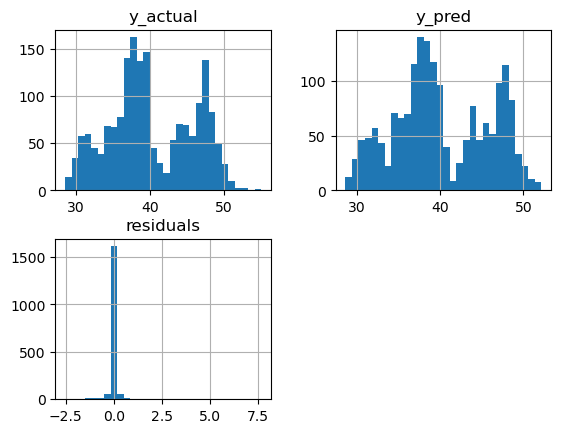

In [157]:
# análise de resíduos/erros por meio de histogramas
pd.DataFrame({'y_actual':y_test,
              'y_pred':y_pred,
              'residuals':y_test - y_pred}).hist(bins=30)

In [159]:
X_test.head(2)

,temperature_C,domingo,quarta-feira,quinta-feira,segunda-feira,sexta-feira,sábado,terça-feira,abr,ago,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2272,30.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2877,23.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
X_test.columns.values

array(['temperature_C', 'domingo', 'quarta-feira', 'quinta-feira',
       'segunda-feira', 'sexta-feira', 'sábado', 'terça-feira', 'abr',
       'ago', 'dez', 'fev', 'jan', 'jul', 'jun', 'mai', 'mar', 'nov',
       'out', 'set', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)

* fazendo a predição final com o modelo treinado

In [168]:
# sabendo que 30/10/2023 é numa segunda-feira, teremos que criar um DataFrame como input do modelo,
# preenchendo os valores na sequência em que foi treinado com seus devidos valores
input=pd.DataFrame({
    'temperature_C':[18.00],
    'domingo':[0],
    'quarta-feira':[0],
    'quinta-feira':[0],
    'segunda-feira':[1],
    'sexta-feira':[0],
    'sábado':[0],
    'terça-feira':[0],
    'abr':[0],
    'ago':[0],
    'dez':[0],
    'fev':[0],
    'jan':[0],
    'jul':[0],
    'jun':[0],
    'mai':[0],
    'mar':[0],
    'nov':[0],
    'out':[1],
    'set':[0],
    '2004':[0],
    '2005':[0],
    '2006':[0],
    '2007':[0],
    '2008':[0],
    '2009':[0],
    '2010':[0],
    '2011':[0],
    '2012':[0],
    '2013':[0],
    '2014':[0],
    '2015':[0],
    '2016':[0],
    '2017':[0],
    '2018':[0],
    '2019':[0],
    '2020':[0],
    '2021':[0],
    '2022':[0],
    '2023':[1]})
input

,temperature_C,domingo,quarta-feira,quinta-feira,segunda-feira,sexta-feira,sábado,terça-feira,abr,ago,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,18.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
ans=model.predict(input)
print(f"""
>> Venda prevista para 30/10/2023 considerando t=18.00°C
utilizando um algoritmo de Random Forest Regressor:

V(t) ~ R${round(ans[0],2)}

""")


>> Venda prevista para 30/10/2023 considerando t=18.00°C
utilizando um algoritmo de Random Forest Regressor:

V(t) ~ R$35.5




## 6. recomendação ao Diretor Financeiro

Para fazer a predição de vendas na data desejada, foram utilizadas duas abordagens:

1. Função obtida da regressão linear simples a partir de 2 pontos consecutivos
2. Algoritmo Random Forest para a regressão não-linear

A partir desses dois modelos, foram obtidas as estimativas de vendas como segue:

* $V(t)\approx R\$23.47$ na primeira abordagem;
* $V(t)\approx R\$35.50$ na segunda abordagem;

A minha recomendação é que se utilize o modelo de ML como resposta mais factível, justamente pelo modelo de regressão linear simples (primeira ordem) ser uma extrapolação local, isto é, ele não considera todo um conjunto de dados (mas sim apenas 2 pontos arbitrários). Além disso houve a otimização dos hiperparâmetros do modelo de ML, o que gerou uma análise mais refinada. Um outro ponto notável é que a predição através de uma reg linear gerou um valor bem abaixo do mínimo global para a variável de vendas (o mínimo encontrado na base de dados original era próximo dos $R\$28.24$, o que indica que o valor encontrado para ele talvez não represente de fato a realidade.

Portanto, eu recomendaria utilizar o modelo de ML treinado para futuras predições de vendas.